In [ ]:
!git clone https://github.com/MOUAEDBZINEH/ESP32cam_Traffic.git

fatal: destination path 'ESP32cam_Traffic' already exists and is not an empty directory.


In [ ]:
!ls ESP32cam_Traffic

Dataset		esp32_cam_control  README.md
Dataset.folder	main.py		   requirements.txt


In [ ]:
!ls -R ESP32cam_Traffic/Dataset/

ESP32cam_Traffic/Dataset/:
Testing  Training

ESP32cam_Traffic/Dataset/Testing:
ahead  left  right  stop

ESP32cam_Traffic/Dataset/Testing/ahead:
a00000_00021_jpg.rf.7ddb9df1ffaab01a265b4af7a8ecae2b.jpg
a00001_00000_jpg.rf.3d151256c82d02aa19224ab6fc1e462c.jpg
a00001_00002_jpg.rf.1fd5fe19f54ea2de9b4693238e011953.jpg
a00001_00003_jpg.rf.e93170d03628be8fe2e9860f8b9a917d.jpg
a00001_00007_jpg.rf.32011f511c77a9217f3fc37311df7c40.jpg
a00001_00017_jpg.rf.878b179b8eb853a13d102a8e73a84078.jpg
a00001_00028_jpg.rf.a32c27ce065168dad635b54cd753856f.jpg
a00002_00000_jpg.rf.244a660eced69bbc9fc6116fbbd6c77d.jpg
a00002_00007_jpg.rf.39944a8abee82caf6a8ed2e5ff3424ff.jpg
a00002_00008_jpg.rf.035f6ee49f76ff616de8fefd0c11e58c.jpg
a00002_00015_jpg.rf.fd9dd04385b7b1f878a89a4d6b06254e.jpg
a00002_00022_jpg.rf.d1dfd426cbac74c490e32cfe72ff9184.jpg
a00003_00016_jpg.rf.12e4b024fdfa30ea75f5ddda491cef9d.jpg
a00004_00003_jpg.rf.a9db151bda046f506619af9b1b7f7582.jpg
a00004_00008_jpg.rf.d943072dd9e9dc4d0c245c672a75ed49.jpg

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import itertools
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
np.random.seed(0)

In [ ]:
dataset_path = "ESP32cam_Traffic/Dataset"
train_path = os.path.join(dataset_path, "Training")
test_path = os.path.join(dataset_path, "Testing")
labels = ['ahead', 'left', 'right', 'stop']
image_size = 150

In [ ]:
def process_image(img_path):
    img = cv2.imread(img_path, 0)
    img = cv2.bilateralFilter(img, 2, 50, 50)
    img = cv2.applyColorMap(img, cv2.COLORMAP_BONE)
    img = cv2.resize(img, (image_size, image_size))
    return img

In [ ]:
x_train, y_train, x_test, y_test = [], [], [], []

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
for label in labels:
    category_index = labels.index(label)

    train_folder = os.path.join(train_path, label)
    for file in tqdm(os.listdir(train_folder), desc=f"Training - {label}"):
        img = cv2.imread(os.path.join(train_folder, file), 0)
        img = cv2.bilateralFilter(img, 2, 50, 50)
        img = cv2.applyColorMap(img, cv2.COLORMAP_BONE)
        img = cv2.resize(img, (image_size, image_size))
        x_train.append(img)
        y_train.append(category_index)

    test_folder = os.path.join(test_path, label)
    for file in tqdm(os.listdir(test_folder), desc=f"Testing - {label}"):
        img = cv2.imread(os.path.join(test_folder, file), 0)
        img = cv2.bilateralFilter(img, 2, 50, 50)
        img = cv2.applyColorMap(img, cv2.COLORMAP_BONE)
        img = cv2.resize(img, (image_size, image_size))
        x_test.append(img)
        y_test.append(category_index)

Testing - stop: 100%|██████████| 85/85 [00:00<00:00, 2073.07it/s]


In [ ]:
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

NameError: name 'np' is not defined

In [ ]:
img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1978 images belonging to 4 classes.
Found 493 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


In [ ]:
print(x_train.shape)
print(x_test.shape)

(2000, 150, 150, 3)
(248, 150, 150, 3)


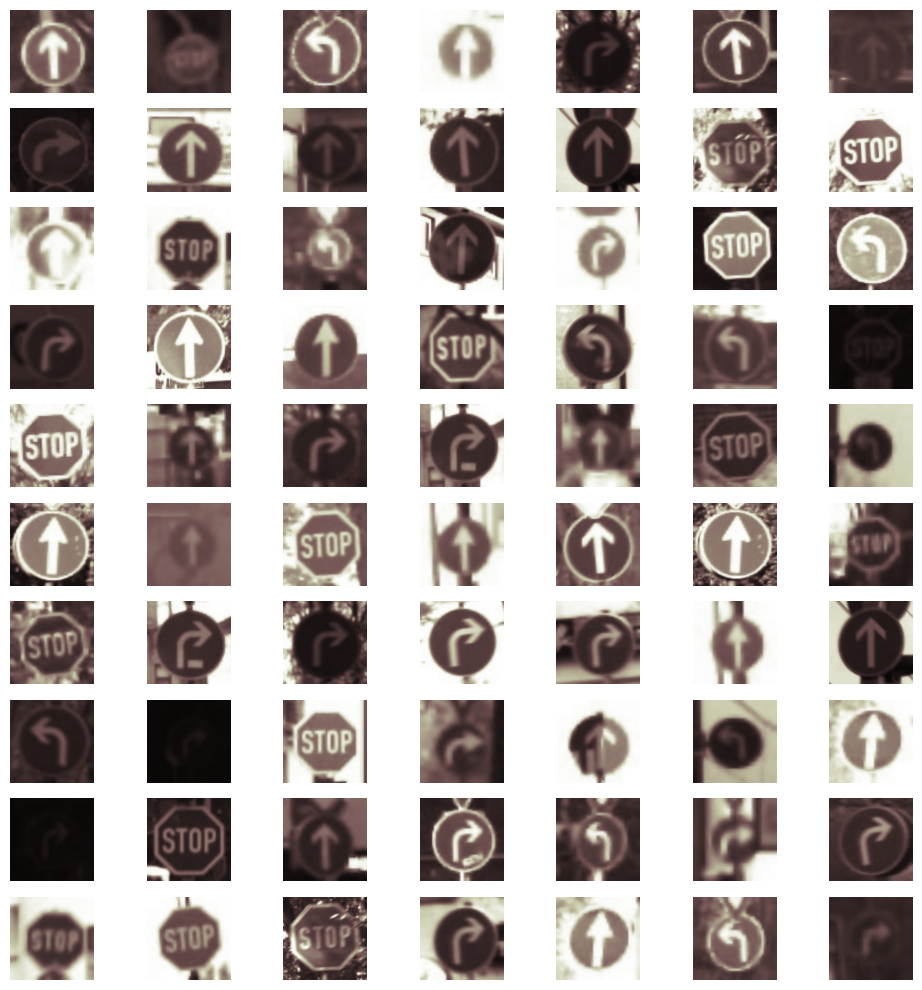

In [ ]:
fig, axes = plt.subplots(10, 7, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(image_size, image_size, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))

    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.15))

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.15))

    model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.15))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.45))

    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 74, 74, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 37, 37, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 18, 18, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     2,654,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,863,492 (10.92 MB)

 Trainable params: 2,863,492 (10.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True
)

In [ ]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    validation_data=validation_generator,
    epochs=45,
    steps_per_epoch=len(x_train) // 32
)

Epoch 1/45
62/62 ━━━━━━━━━━━━━━━━━━━━ 24s 258ms/step - accuracy: 0.3624 - loss: 1.3473 - val_accuracy: 0.3915 - val_loss: 1.3513
Epoch 2/45
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - accuracy: 0.3917 - loss: 1.3077 - val_accuracy: 0.3915 - val_loss: 1.3191
Epoch 3/45
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.4651 - loss: 1.1896 - val_accuracy: 0.6592 - val_loss: 0.8916
Epoch 4/45
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - accuracy: 0.6527 - loss: 0.8666 - val_accuracy: 0.7951 - val_loss: 0.5987
Epoch 5/45
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.7329 - loss: 0.6764 - val_accuracy: 0.8012 - val_loss: 0.5394
Epoch 6/45
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - accuracy: 0.7942 - loss: 0.5447 - val_accuracy: 0.8316 - val_loss: 0.3661
Epoch 7/45
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - accuracy: 0.8212 - loss: 0.4467 - val_accuracy: 0.8702 - val_loss: 0.2982
Epoch 8/45
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - accuracy: 0.8424 - loss: 0.4001 - val_accu

In [ ]:
score = model.evaluate(x_train, y_train, verbose=0)
train_loss = score[0] * 100
train_accuracy = score[1] * 100

print(f"Training Loss: {train_loss:.2f}%")
print(f"Training Accuracy: {train_accuracy:.2f}%")

Training Loss: 4.83%
Training Accuracy: 97.95%


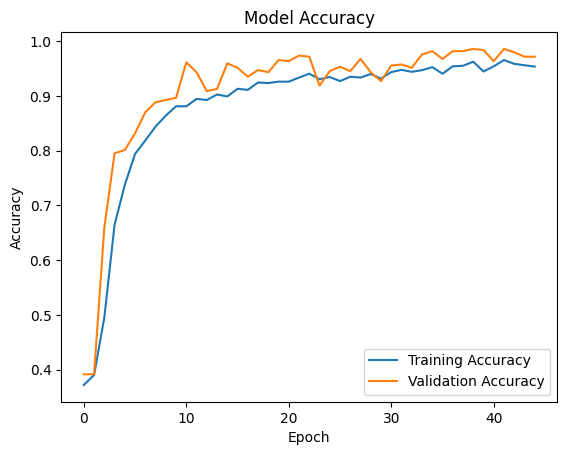

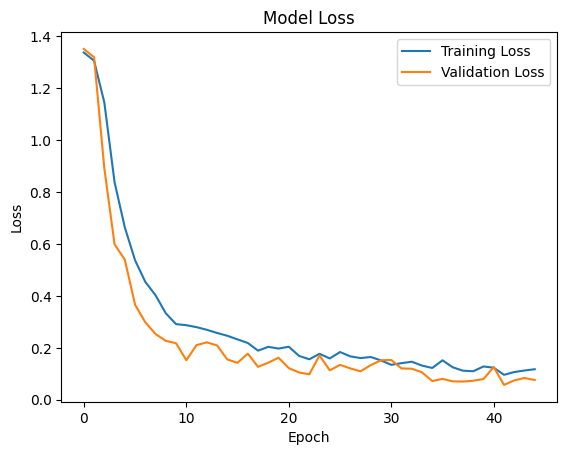

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
random_index = np.random.randint(0, len(x_test))
random_img = x_test[random_index]

random_img_resized = cv2.resize(random_img, (150, 150))

random_img_resized = random_img_resized / 255.0

In [ ]:
predictions = model.predict(random_img_resized.reshape(1, 150, 150, 3))
predicted_class = np.argmax(predictions)
predicted_label = labels[predicted_class]
confidence = predictions[0][predicted_class]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Predicted label: right 
Actual label: ahead 
Confidence: 98.86%



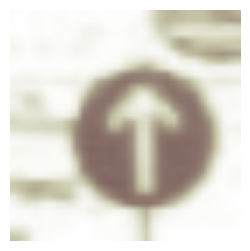

In [ ]:
actual_index = y_test[random_index]
actual_class = np.argmax(actual_index)
actual_label = labels[actual_class]

print(f"Predicted label: {predicted_label} \nActual label: {actual_label} \nConfidence: {confidence*100:.2f}%\n")
plt.figure(figsize=(3, 3))
plt.imshow(random_img)
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted label: right 
Actual label: stop 
Confidence: 98.89%



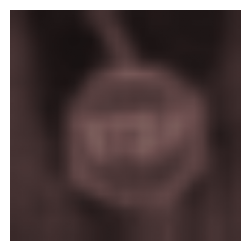

In [ ]:
random_index = np.random.randint(0, len(x_test))
random_img = x_test[random_index]

random_img_resized = cv2.resize(random_img, (150, 150))
random_img_resized = random_img_resized / 255.0

predictions = model.predict(random_img_resized.reshape(1, 150, 150, 3))
predicted_class = np.argmax(predictions)
predicted_label = labels[predicted_class]
confidence = predictions[0][predicted_class]

actual_index = np.argmax(y_test[random_index])
actual_label = labels[actual_index]

print(f"Predicted label: {predicted_label} \nActual label: {actual_label} \nConfidence: {confidence*100:.2f}%\n")
plt.figure(figsize=(3, 3))
plt.imshow(random_img)
plt.axis('off')
plt.show()

In [ ]:
score = model.evaluate(test_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.12439993023872375
Test accuracy: 0.954692542552948


In [ ]:
score = model.evaluate(x_test, y_test)
test_loss = score[0] * 100
test_accuracy = score[1] * 100

print(f"Test Loss: {test_loss:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9333 - loss: 0.1192
Test Loss: 9.68%
Test Accuracy: 94.76%


In [ ]:
model.save("ESP32cam_Traffic.h5")
print("Model saved as ESP32cam_Traffic.h5")

Model saved as ESP32cam_Traffic.h5


Expected Input Format: (None, 150, 150, 3)


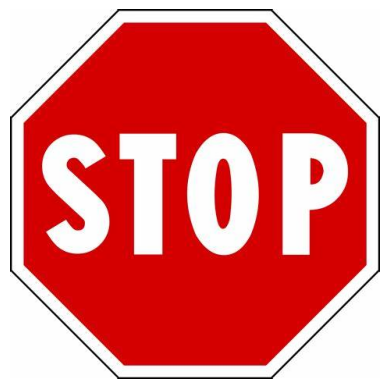

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
Predicted Label: stop (Class: 3)
Confidence: 100.00%


In [ ]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from tensorflow.keras.models import load_model

model = load_model("ESP32cam_Traffic.h5")

print("Expected Input Format:", model.input_shape)

_, image_size, _, channels = model.input_shape

labels = ['ahead', 'left', 'right', 'stop']

def process_image(image):
    if isinstance(image, np.ndarray):
        img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        raise ValueError("Unexpected Format!")

    img = cv2.bilateralFilter(img, 2, 50, 50)
    img = cv2.resize(img, (image_size, image_size))

    if channels == 3:
        img = np.stack((img,)*3, axis=-1)

    return img

img_url = 'https://th.bing.com/th/id/OIP.7vcA5IMLyjy3v0hiqk088QHaHa?rs=1&pid=ImgDetMain'
response = requests.get(img_url, stream=True)

img = Image.open(response.raw)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

img = np.asarray(img)
img = process_image(img)

img = img.reshape(1, image_size, image_size, channels)
img = img.astype(np.float32) / 255.0

prediction = model.predict(img)
predicted_class = np.argmax(prediction, axis=1)[0]
predicted_label = labels[predicted_class]
confidence = prediction[0][predicted_class]

print(f"Predicted Label: {predicted_label} (Class: {predicted_class})")
print(f"Confidence: {confidence*100:.2f}%")
